In [9]:
# 2.1

import pandas
import seaborn
import numpy

import matplotlib.pyplot as plot
import matplotlib.ticker as ticker

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

champions = pandas.read_csv('datasets/Combined Traits.csv')

pandas.set_option('display.max_rows', None)

print(champions)

               name releasedate  popularity_spot  popularity  winrate  \
0            Aatrox   13/6/2013               17       0.107    0.495   
1              Ahri  14/12/2011               32       0.085    0.510   
2             Akali   11/5/2010               46       0.072    0.493   
3            Akshan   22/7/2021              162       0.017    0.486   
4           Alistar   21/2/2009               77       0.050    0.490   
5             Amumu   26/6/2009               24       0.094    0.534   
6            Anivia   10/7/2009              148       0.025    0.527   
7             Annie   21/2/2009              158       0.018    0.510   
8          Aphelios  11/12/2019              107       0.040    0.468   
9              Ashe   21/2/2009               16       0.108    0.496   
10     Aurelion Sol   24/3/2016              121       0.035    0.520   
11           Aurora   17/7/2024              106       0.040    0.483   
12             Azir   16/9/2014              140   

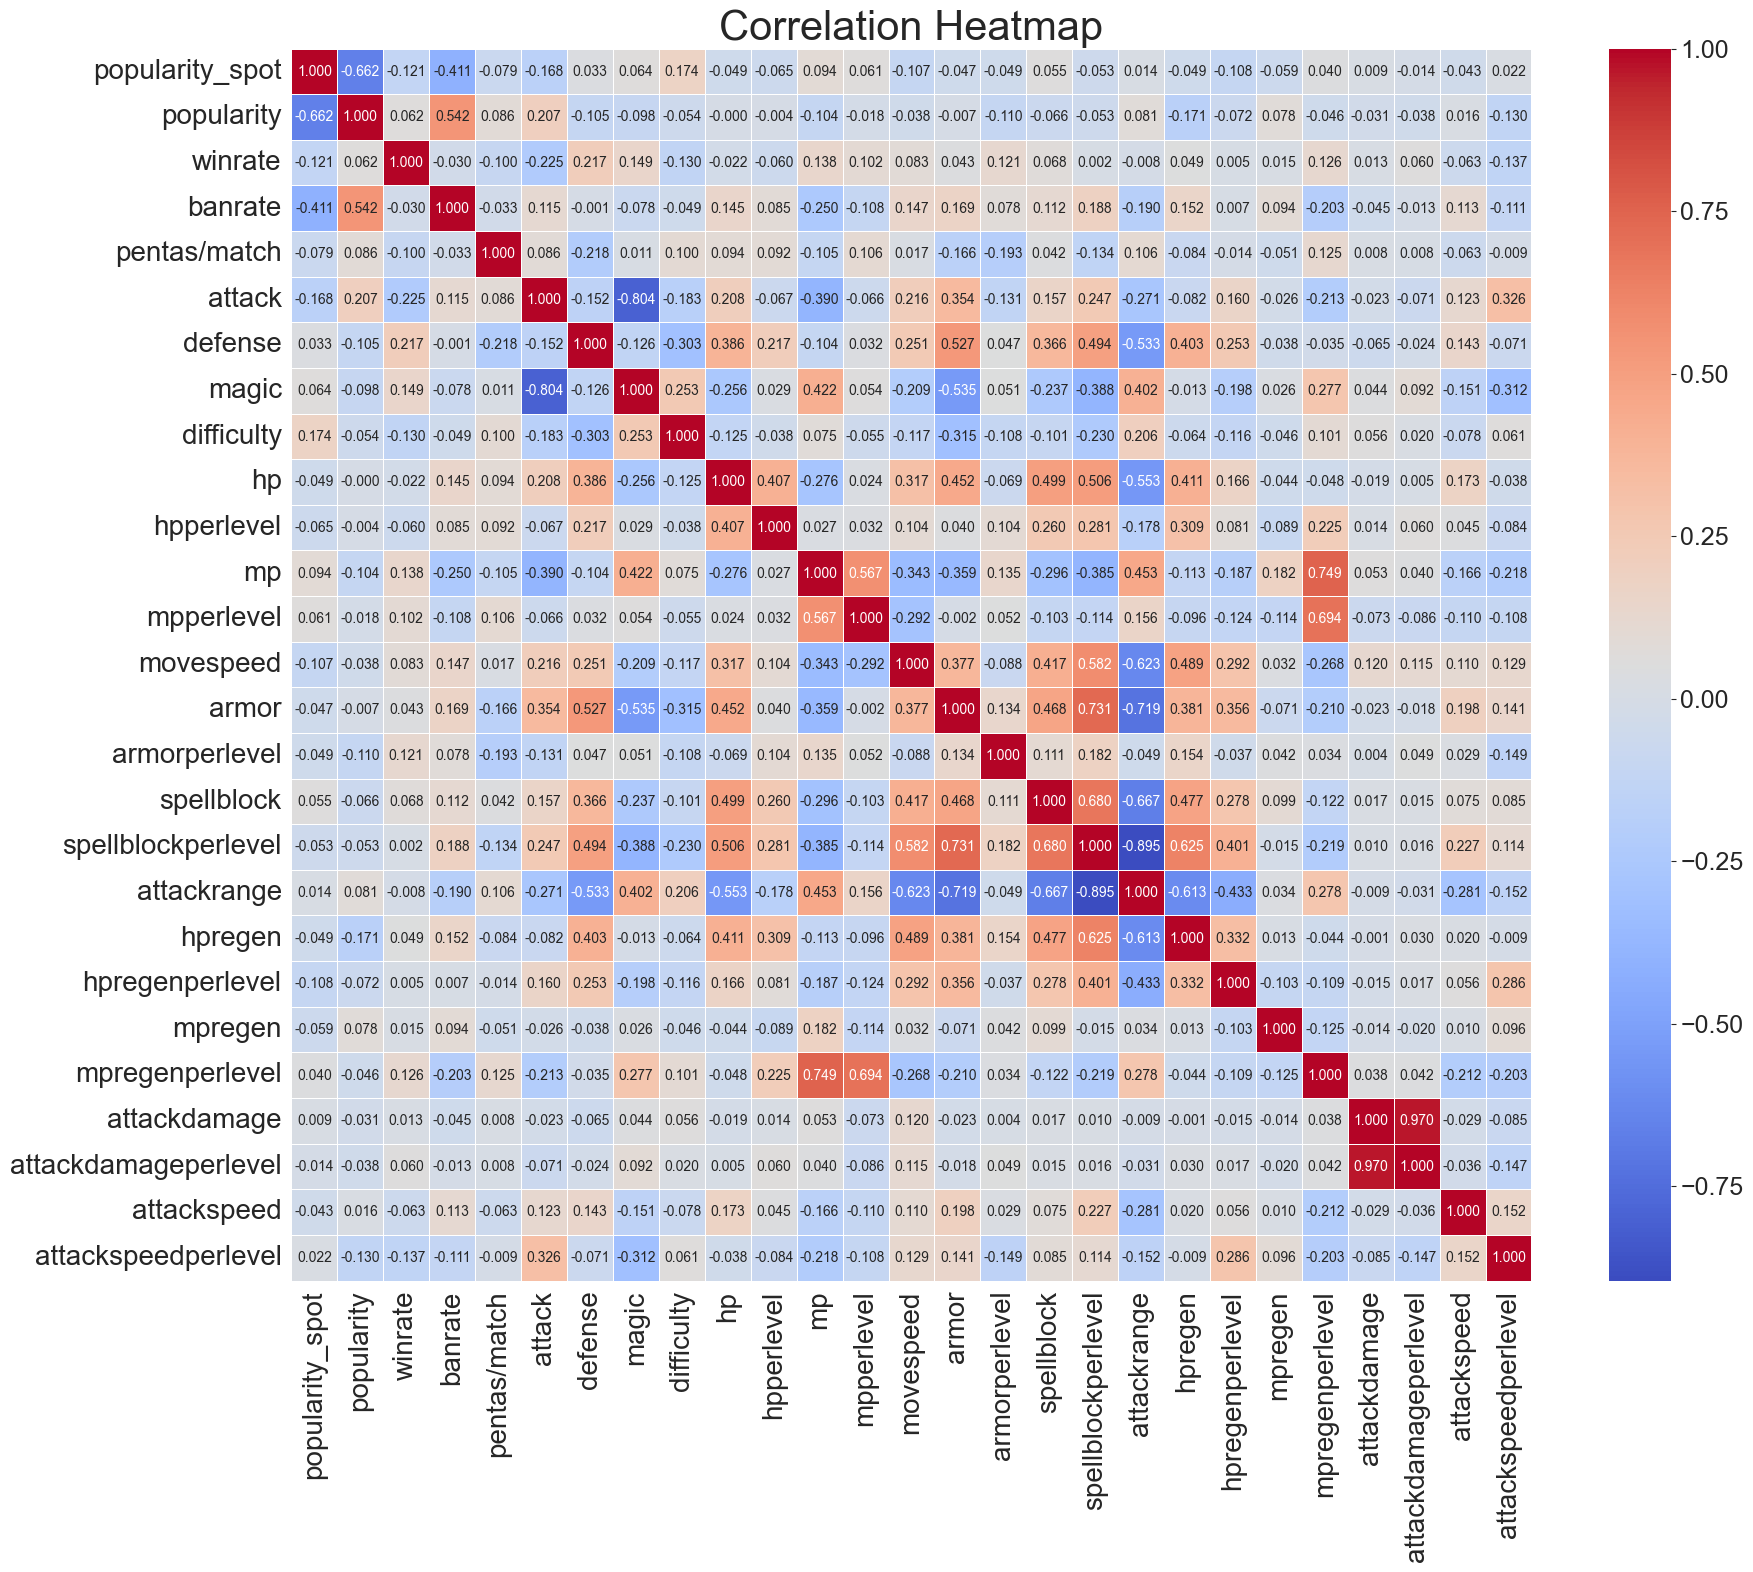

In [10]:
# 2.3.1

numeric_columns = champions.select_dtypes(include=[numpy.number]).columns

champions[numeric_columns] = champions[numeric_columns].apply(pandas.to_numeric, errors='coerce')
champions = champions.dropna(subset=numeric_columns)

correlation_matrix = champions[numeric_columns].corr()

plot.figure(figsize=(20, 16))

heatmap = seaborn.heatmap(correlation_matrix, fmt=".3f", annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})

colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=18)

plot.title('Correlation Heatmap', fontsize=30)
plot.xticks(fontsize=20)
plot.yticks(fontsize=20)
plot.show()

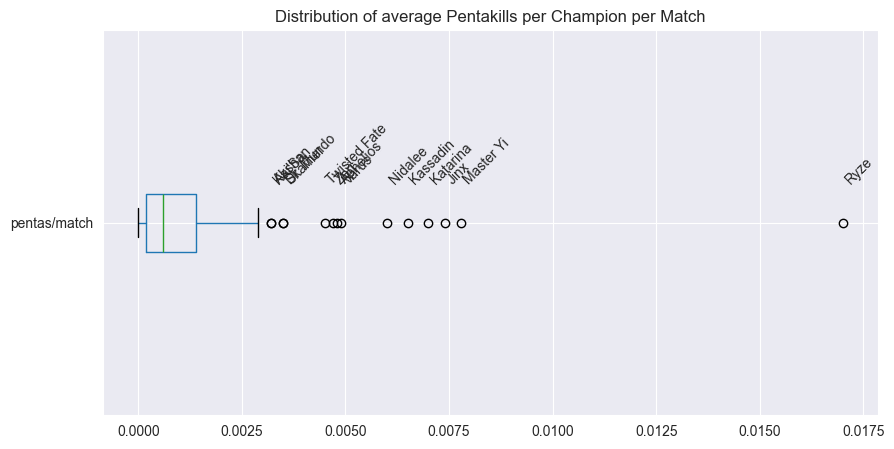

In [10]:
# 4.1

plot.figure(figsize=(10, 5))
plot.title('Distribution of average Pentakills per Champion per Match')

boxplot = champions.boxplot(column=['pentas/match'], vert=False)

Q1 = champions['pentas/match'].quantile(0.25)
Q3 = champions['pentas/match'].quantile(0.75)
IQR = Q3 - Q1
outliers = champions[(champions['pentas/match'] < (Q1 - 1.5 * IQR)) | (champions['pentas/match'] > (Q3 + 1.5 * IQR))]

for i in range(outliers.shape[0]):
    plot.annotate(outliers['name'].iloc[i],
                  xy=(outliers['pentas/match'].iloc[i], 1),
                  xytext=(outliers['pentas/match'].iloc[i], 1.1),
                  rotation=45)
    
plot.show()

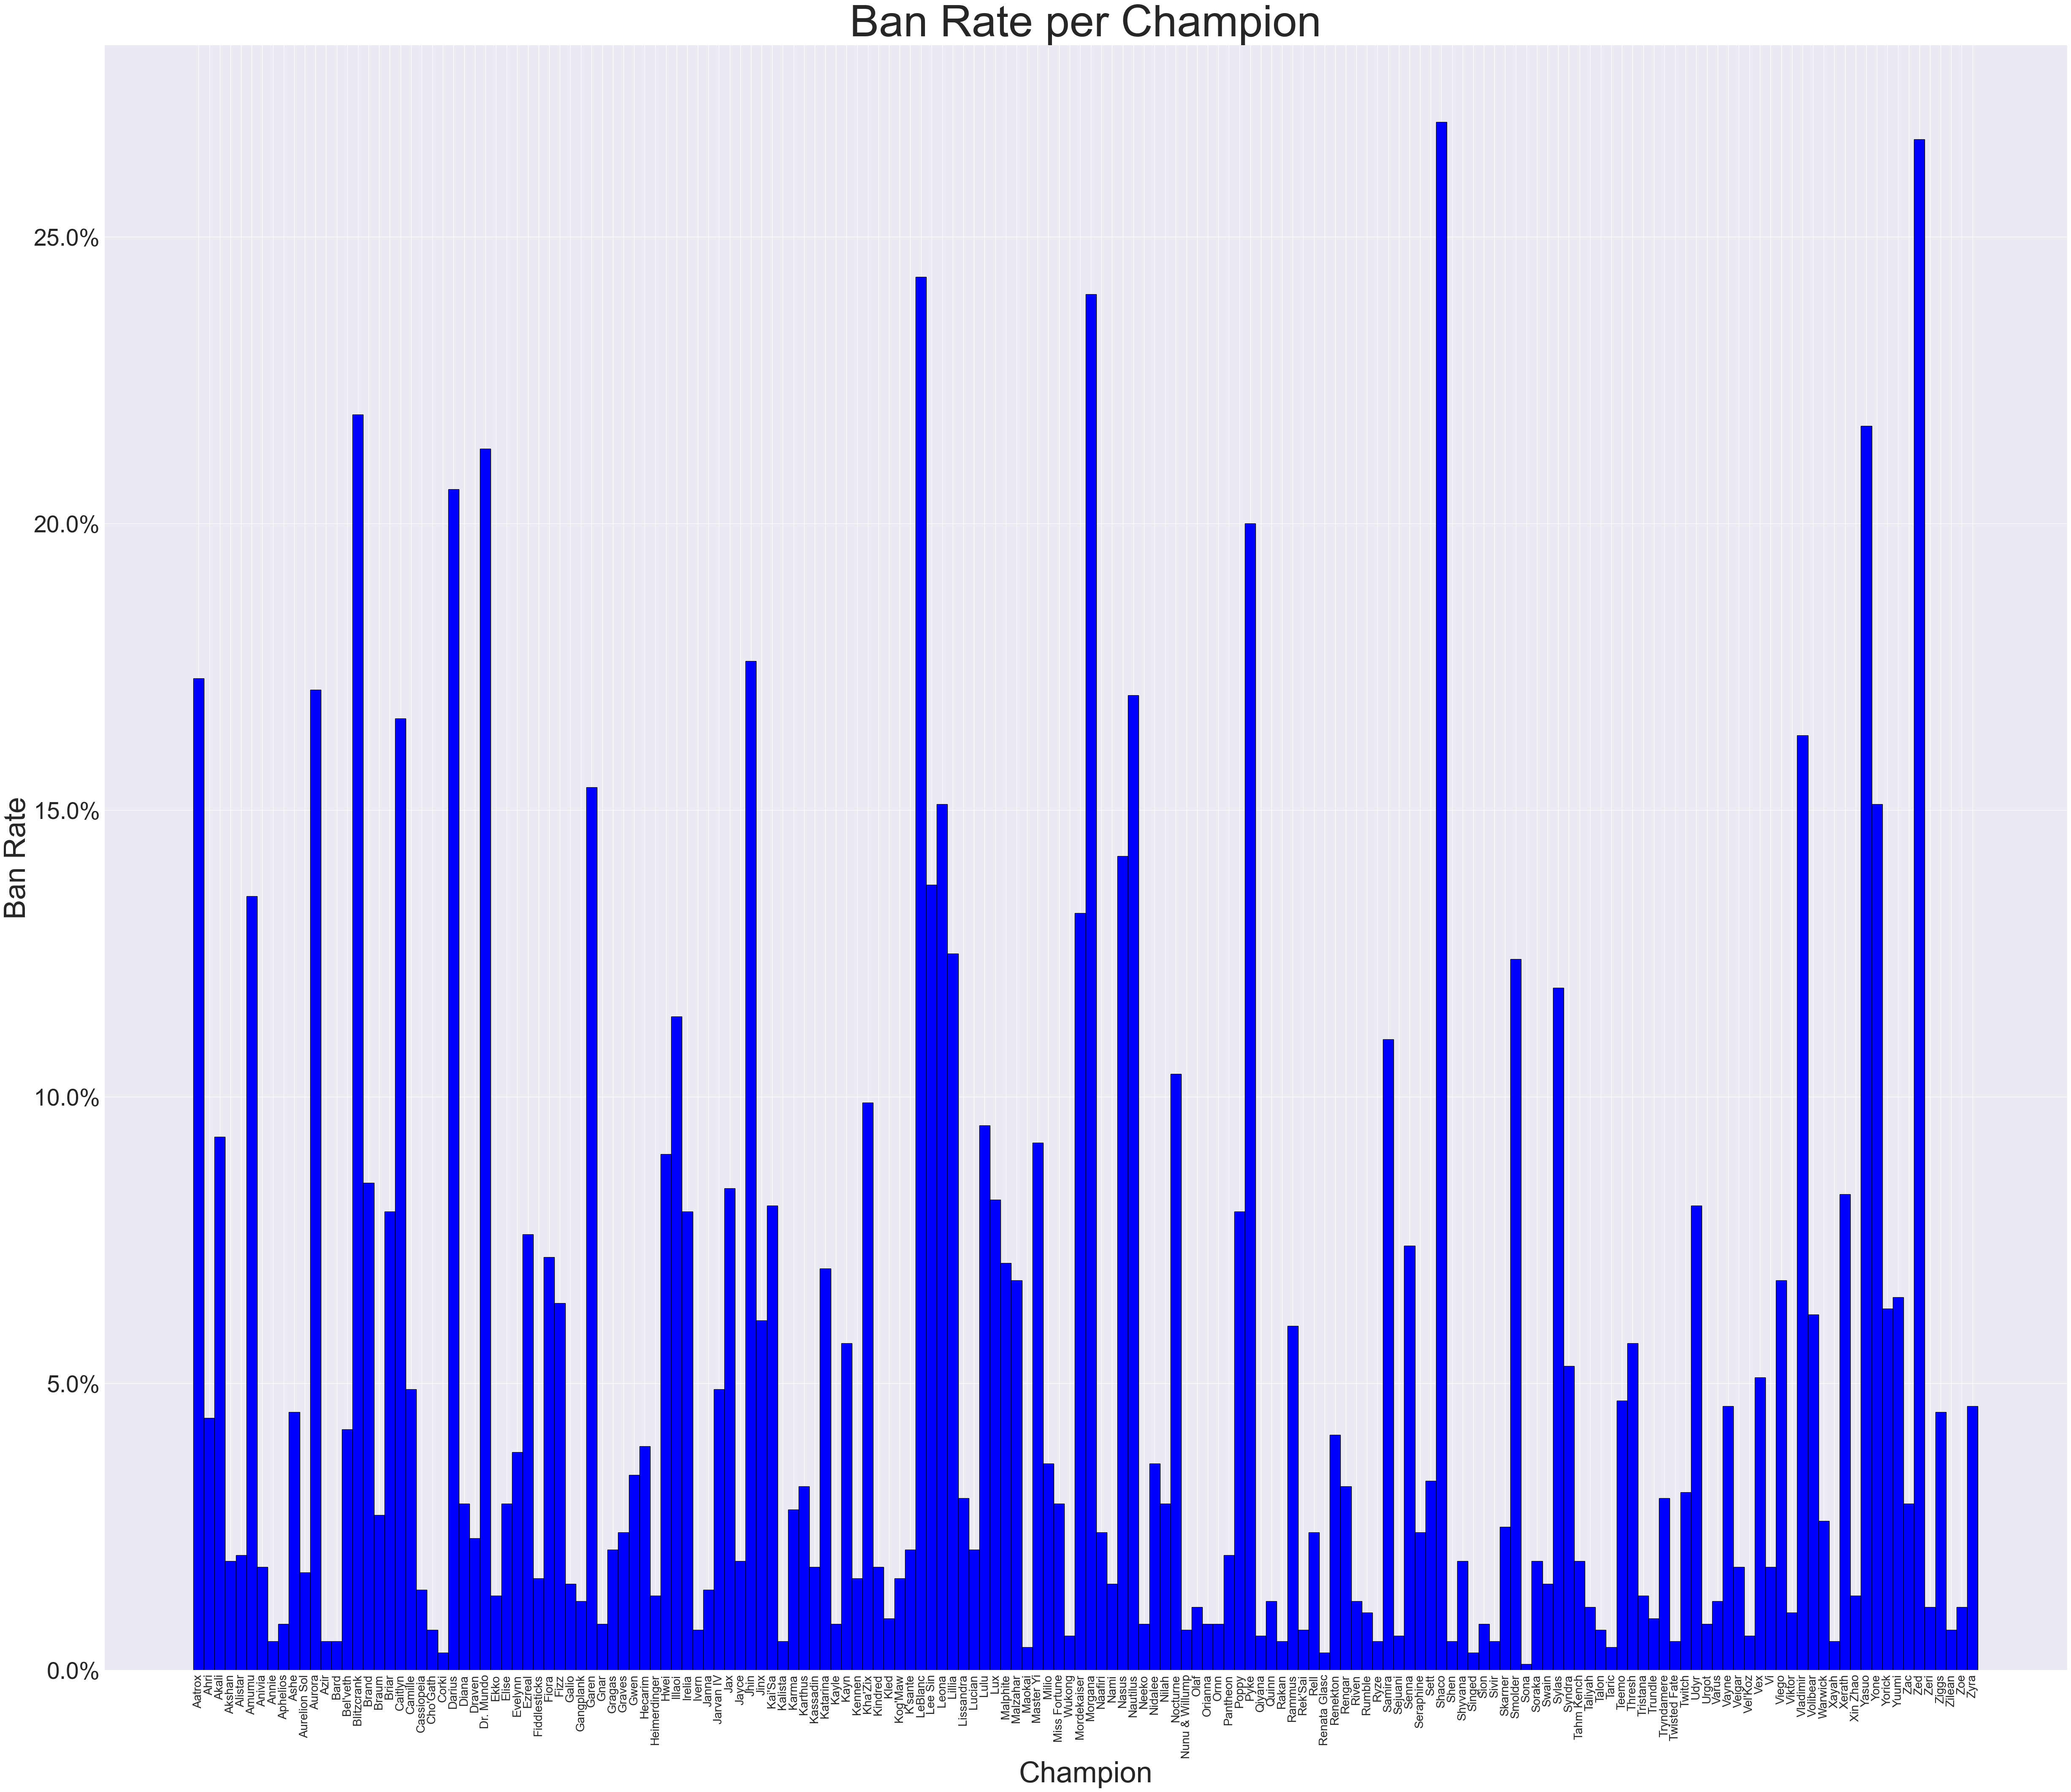

In [11]:
# 4.2

plot.figure(figsize=(60, 50))
plot.bar(champions['name'], champions['banrate'], color='blue', edgecolor='black', width=1)

plot.title('Ban Rate per Champion', fontsize=75)
plot.xlabel('Champion', fontsize=50)
plot.ylabel('Ban Rate', fontsize=50)
plot.xticks(rotation=90, fontsize=20)
plot.yticks(fontsize=40)
plot.gca().yaxis.set_major_formatter(ticker.PercentFormatter(1.0))

plot.show()

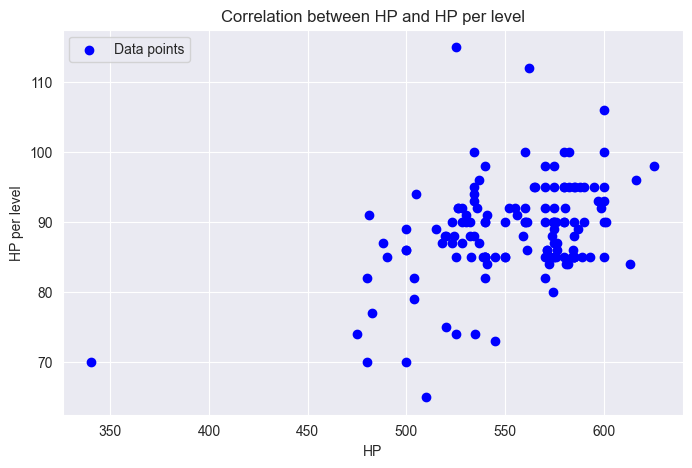

In [12]:
# 4.3

champions = champions.dropna()

x = champions['hp'].values.reshape(-1, 1)
y = champions['hpperlevel'].values

plot.figure(figsize=(8, 5))
plot.scatter(x, y, color='blue', label='Data points')
plot.xlabel('HP')
plot.ylabel('HP per level')
plot.title('Correlation between HP and HP per level')
plot.legend(loc='upper left')
plot.grid(True)

plot.show()

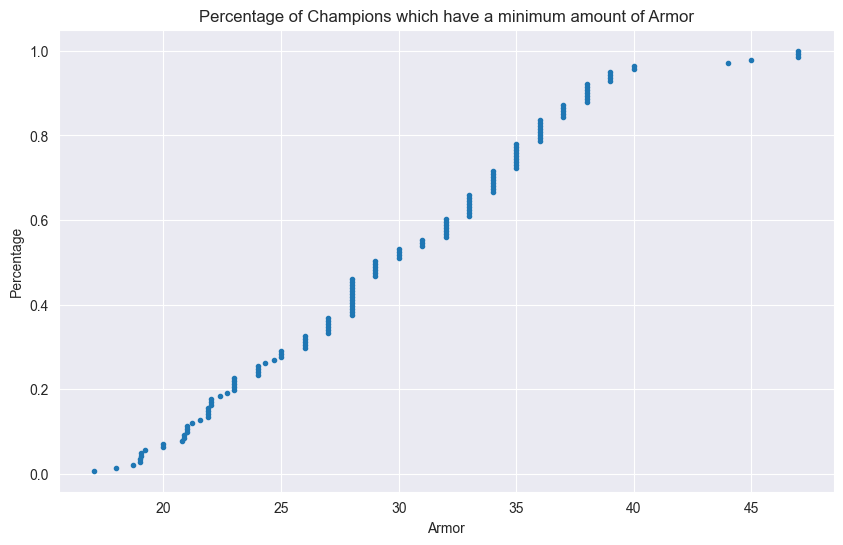

In [13]:
# 4.4

armorSorted = champions['armor'].sort_values()

cdf = numpy.arange(1, len(armorSorted) + 1) / len(armorSorted)

plot.figure(figsize=(10, 6))
plot.plot(armorSorted, cdf, marker='.', linestyle='none')
plot.xlabel('Armor')
plot.ylabel('Percentage')
plot.title('Percentage of Champions which have a minimum amount of Armor')
plot.grid(True)
plot.show()

In [14]:
# 5.1

features = ['attackdamage']
target = 'attackdamageperlevel'

champions = champions.dropna(subset=features + [target])

X = champions[features]
Y = champions[target]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

linear = LinearRegression()
linear.fit(X_train, Y_train)

Y_prediction = linear.predict(X_test)

print("Determination Coefficient (R^2):", r2_score(Y_test, Y_prediction))
print("Mean Square Error (MSE):", mean_squared_error(Y_test, Y_prediction))

Determination Coefficient (R^2): 0.1476228551800477
Mean Square Error (MSE): 0.21927787191177023


In [15]:
# 5.2

features = ['popularity', 'winrate']
target = 'banrate'

champions = champions.dropna(subset=features + [target])

X = champions[features]
Y = champions[target]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

linear = LinearRegression()
linear.fit(X_train, Y_train)

Y_prediction = linear.predict(X_test)

print("Determination Coefficient (R^2):", r2_score(Y_test, Y_prediction))
print("Mean Square Error (MSE):", mean_squared_error(Y_test, Y_prediction))

Determination Coefficient (R^2): 0.24931904093175195
Mean Square Error (MSE): 0.0032800134216433487


C:\Users\louis\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Train Determination Coefficient (R^2): 0.9479128470193281
Test Determination Coefficient (R^2): 0.021642763263090115
Overall Determination Coefficient (R^2): 0.9373363137833869
Train Mean Squared Error (MSE): 0.33356858155289787
Test Mean Squared Error (MSE): 0.2830939504485124
Overall Mean Squared Error (MSE): 0.323292309352005


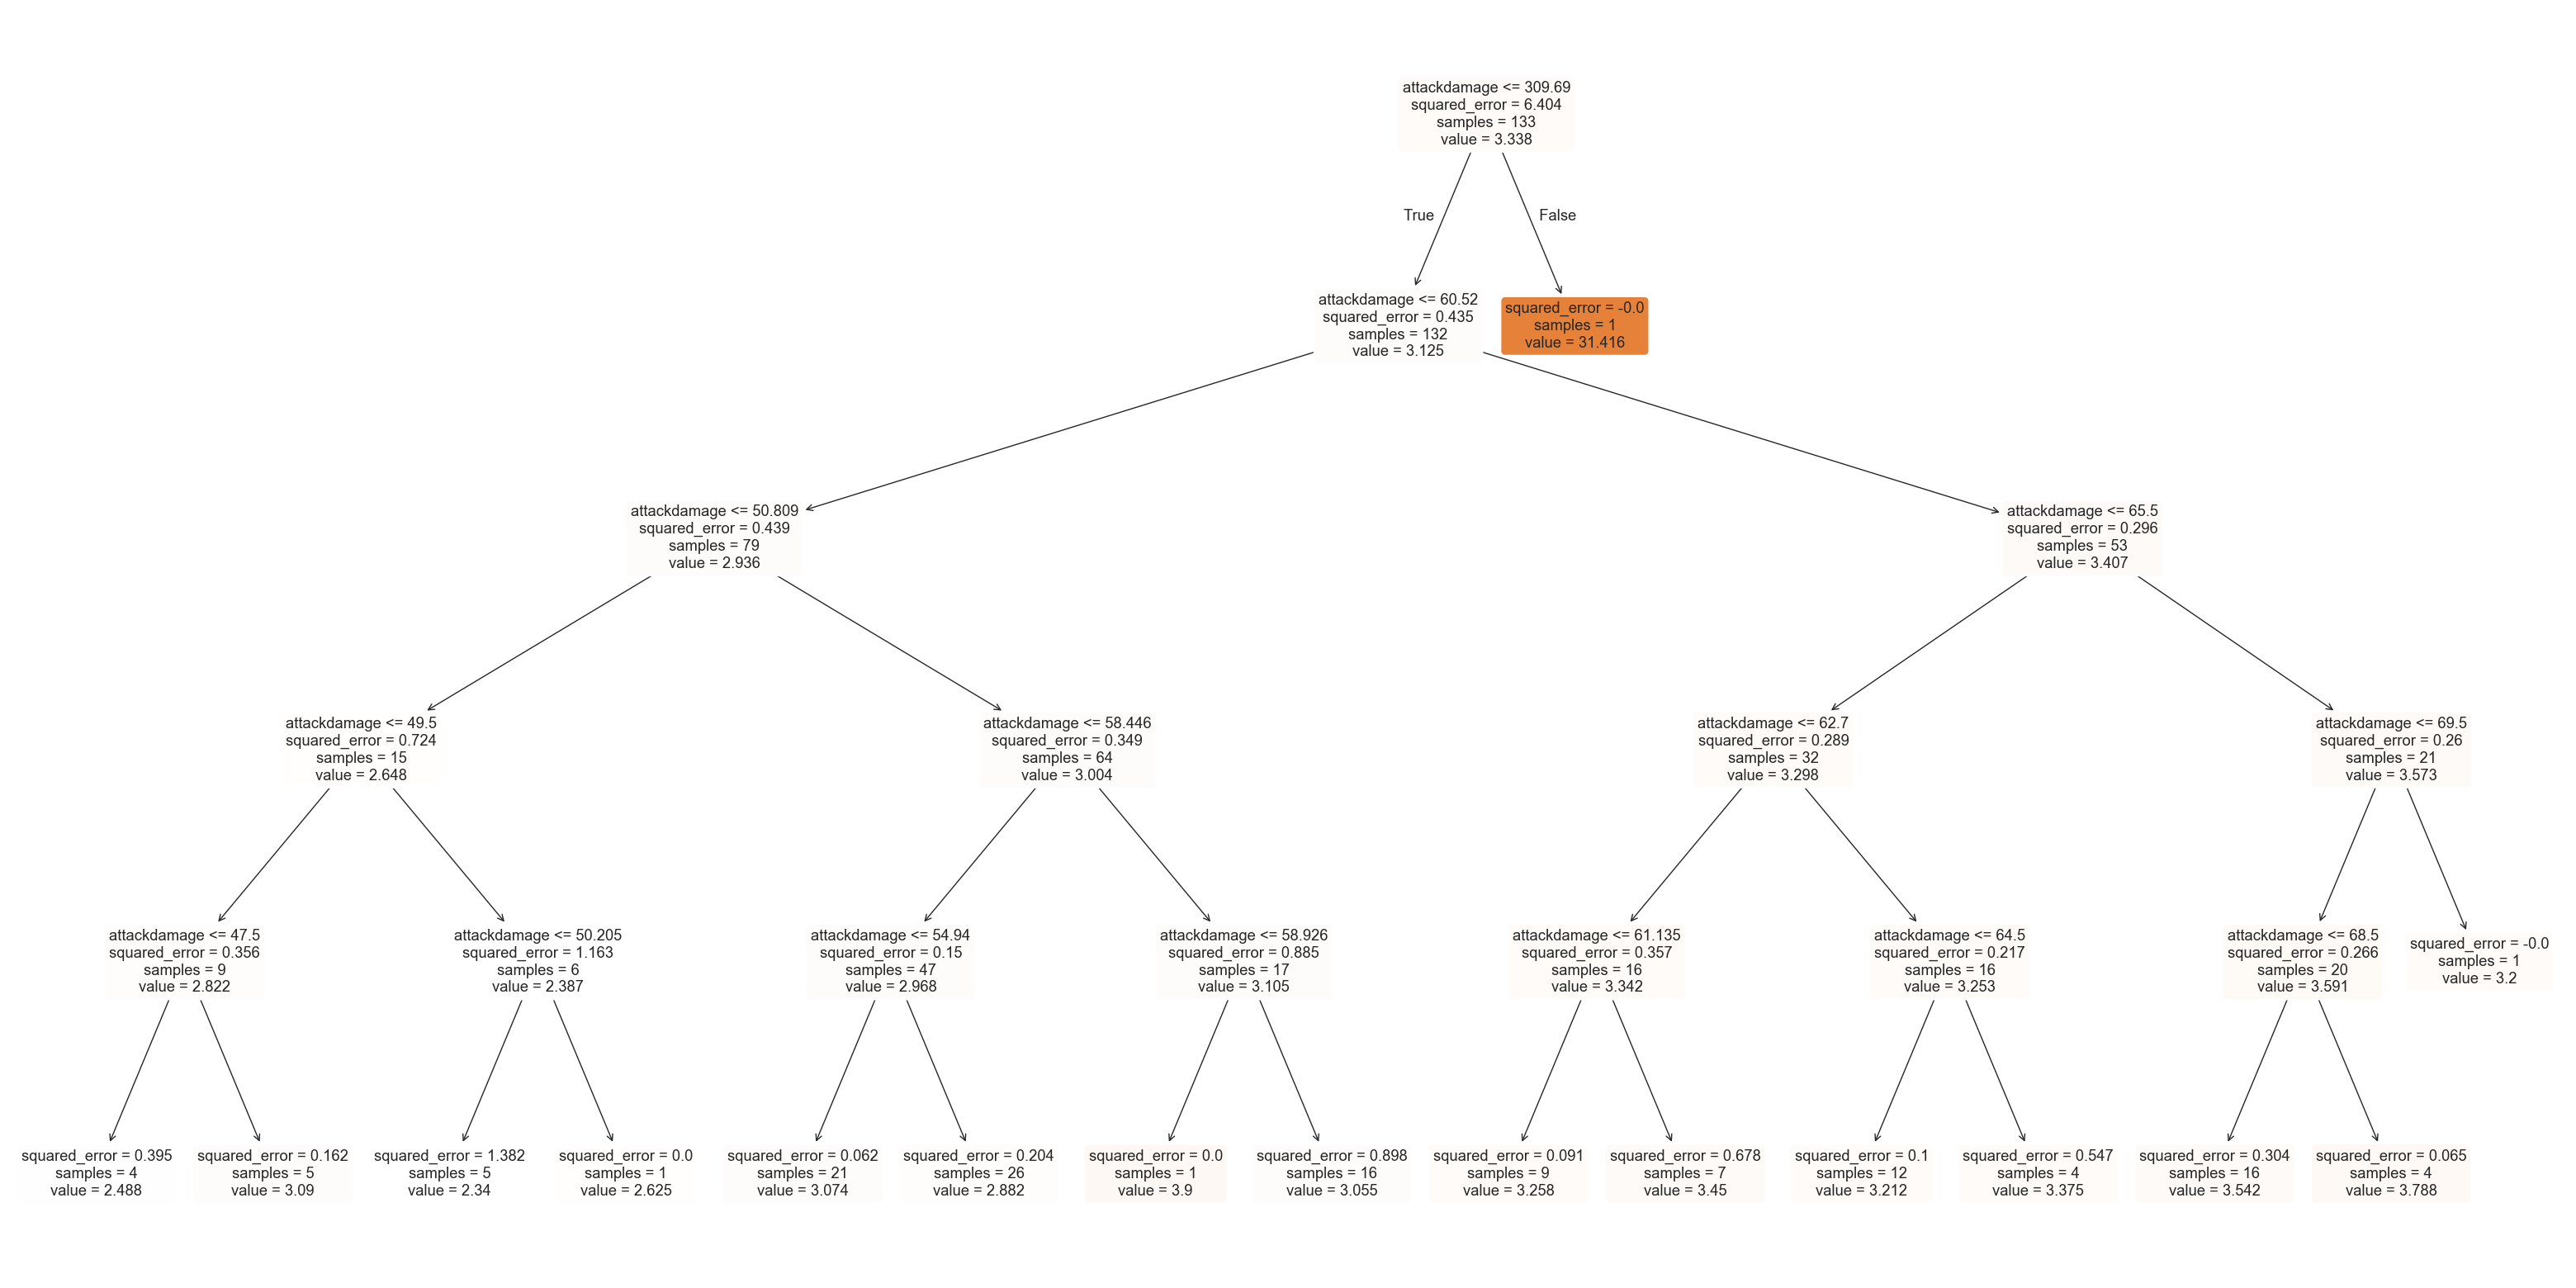

In [6]:
# 6.1.1

features = ['attackdamage']
target = 'attackdamageperlevel'

champions = champions.dropna(subset=features + [target])

X = champions[features]
Y = champions[target]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

regressionTree = DecisionTreeRegressor(max_depth=5, random_state=42)
regressionTree.fit(X_train, Y_train)

Y_train_pred = regressionTree.predict(X_train)
Y_test_pred = regressionTree.predict(X_test)

X_full = numpy.concatenate([X_train, X_test])
Y_full = numpy.concatenate([Y_train, Y_test])

Y_pred_full = regressionTree.predict(X_full)

Y_combined = numpy.concatenate([Y_train, Y_test])
Y_combined_pred = numpy.concatenate([Y_train_pred, Y_test_pred])

TrainR2 = regressionTree.score(X_train, Y_train)
TestR2 = regressionTree.score(X_test, Y_test)
OverallR2 = r2_score(Y_full, Y_pred_full)

TrainMSE = mean_squared_error(Y_train, Y_train_pred)
TestMSE = mean_squared_error(Y_test, Y_test_pred)
OverallMSE = mean_squared_error(Y_combined, Y_combined_pred)

print("Train Determination Coefficient (R^2):", TrainR2)
print("Test Determination Coefficient (R^2):", TestR2)
print("Overall Determination Coefficient (R^2):", OverallR2)

print("Train Mean Squared Error (MSE):", TrainMSE)
print("Test Mean Squared Error (MSE):", TestMSE)
print("Overall Mean Squared Error (MSE):", OverallMSE)

plot.figure(figsize=(40, 20))
plot_tree(regressionTree, feature_names=features, filled=True, rounded=True)
plot.show()

C:\Users\louis\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Train Determination Coefficient (R^2): 0.7172054122568521
Test Determination Coefficient (R^2): -0.26709983418304306
Overall Determination Coefficient (R^2): 0.5585842790318705
Train Mean Squared Error (MSE): 0.0010952845252228313
Test Mean Squared Error (MSE): 0.0037477974177685847
Overall Mean Squared Error (MSE): 0.0016353170901722662


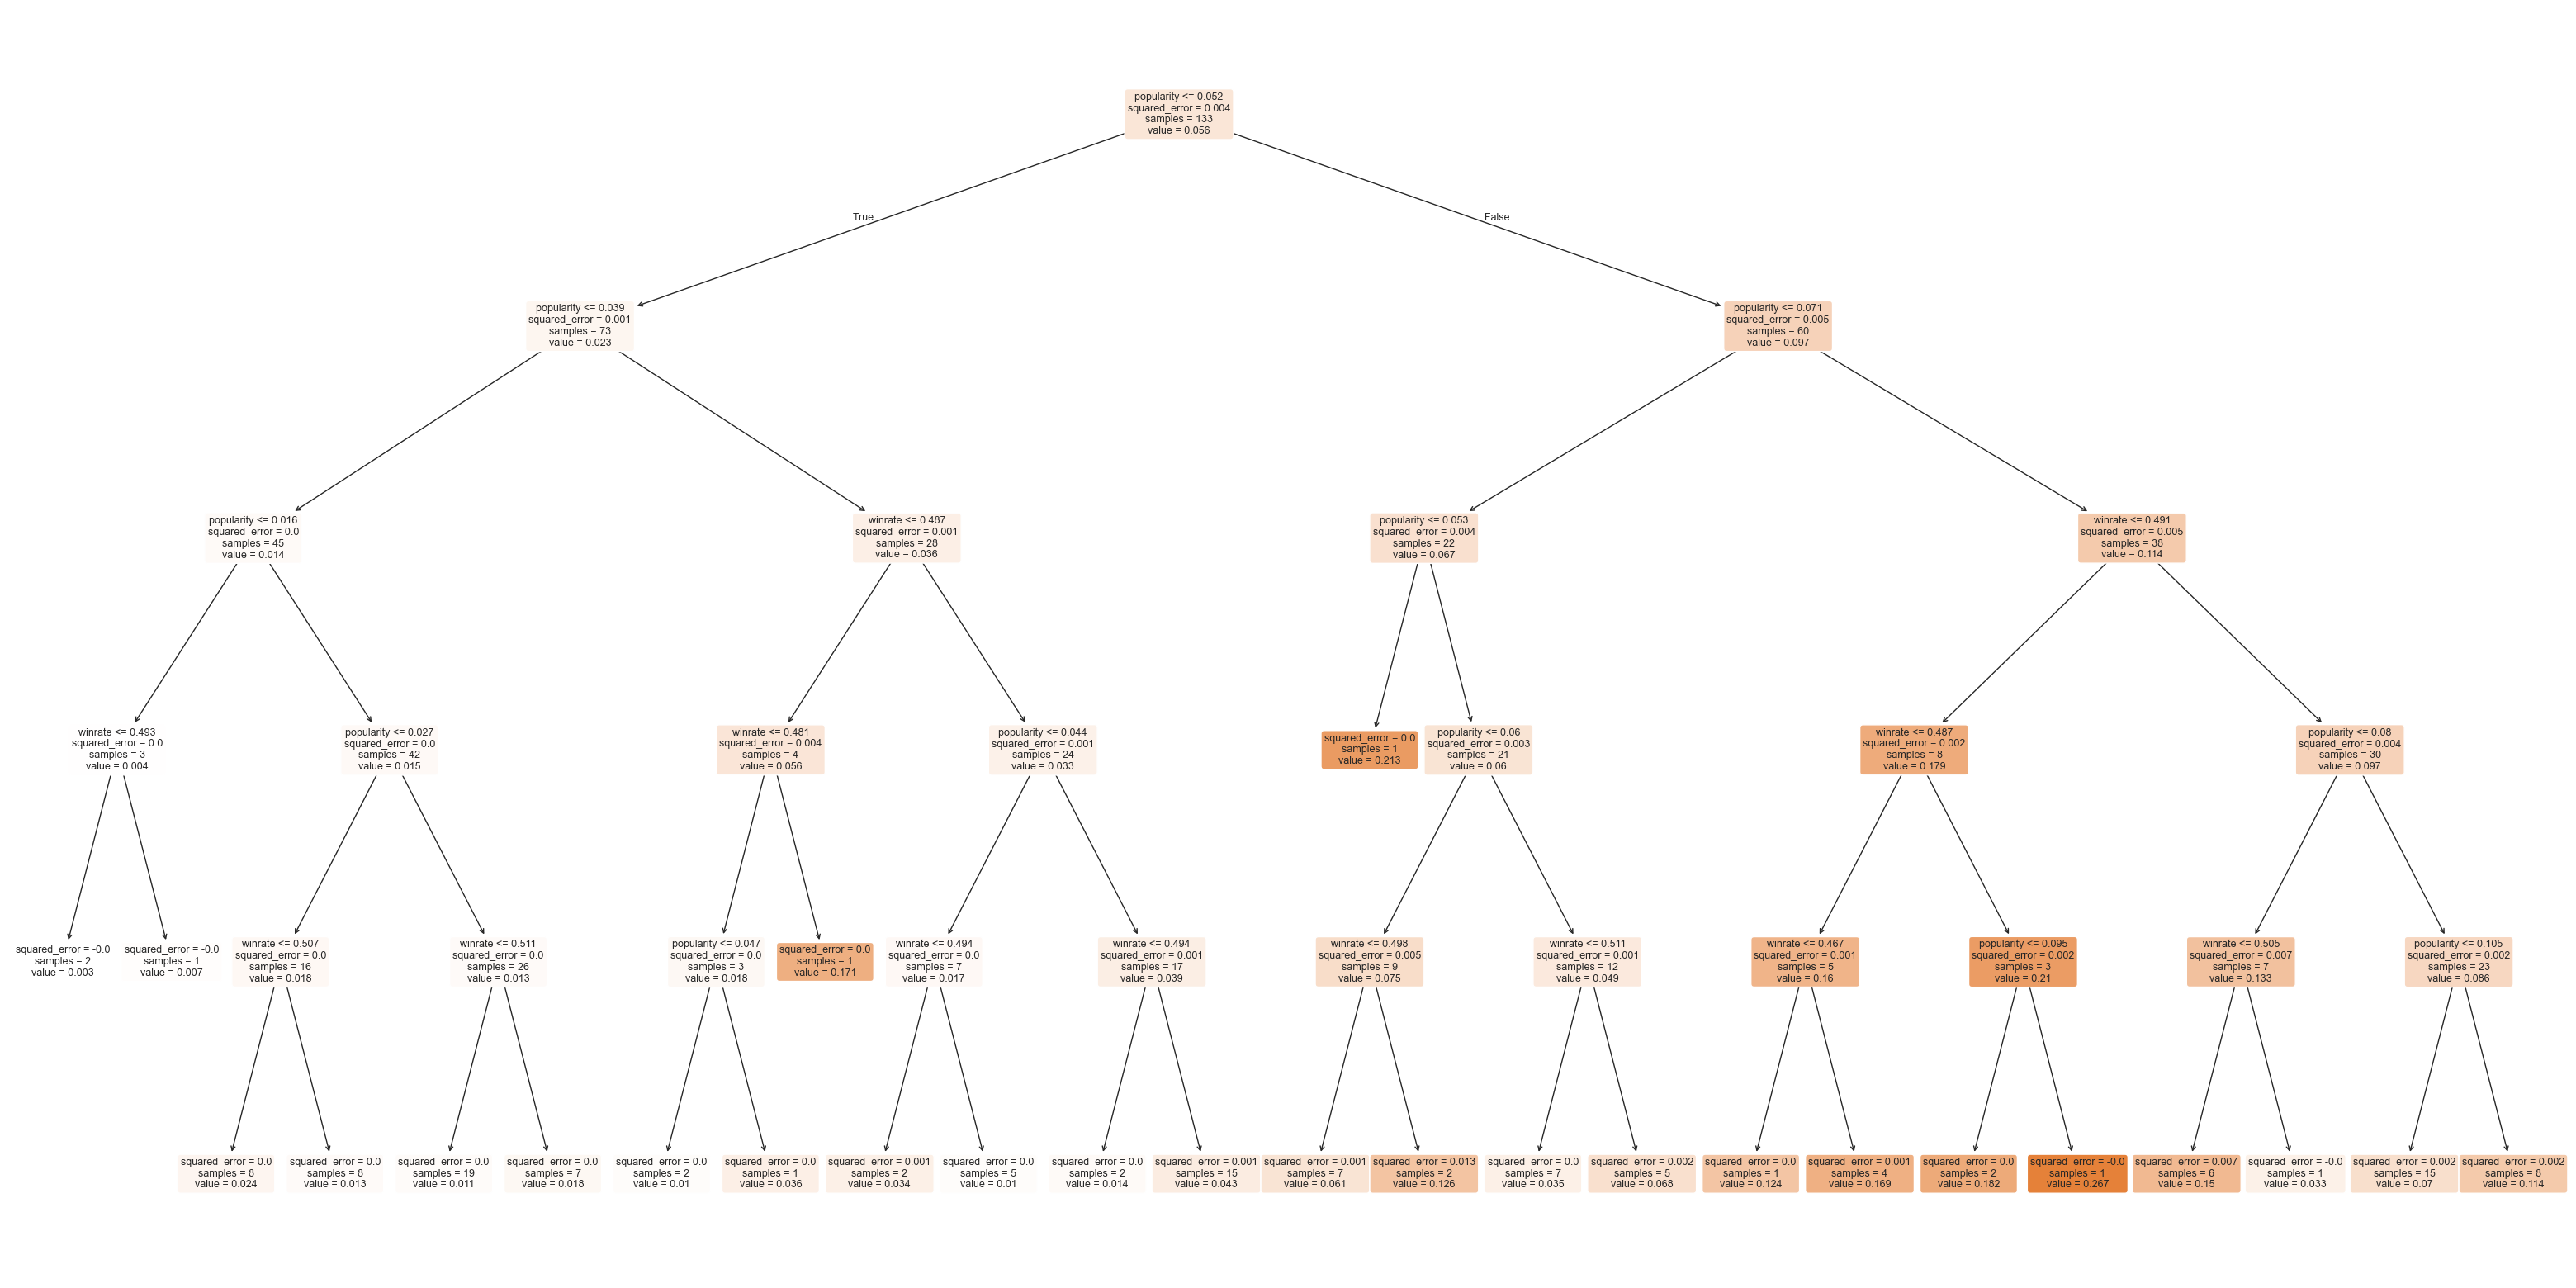

In [7]:
# 6.1.2

features = ['popularity', 'winrate']
target = 'banrate'

champions = champions.dropna(subset=features + [target])

X = champions[features]
Y = champions[target]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

regressionTree = DecisionTreeRegressor(max_depth=5, random_state=42)
regressionTree.fit(X_train, Y_train)

Y_train_pred = regressionTree.predict(X_train)
Y_test_pred = regressionTree.predict(X_test)

X_full = numpy.concatenate([X_train, X_test])
Y_full = numpy.concatenate([Y_train, Y_test])

Y_pred_full = regressionTree.predict(X_full)

Y_combined = numpy.concatenate([Y_train, Y_test])
Y_combined_pred = numpy.concatenate([Y_train_pred, Y_test_pred])

TrainR2 = regressionTree.score(X_train, Y_train)
TestR2 = regressionTree.score(X_test, Y_test)
OverallR2 = r2_score(Y_full, Y_pred_full)

TrainMSE = mean_squared_error(Y_train, Y_train_pred)
TestMSE = mean_squared_error(Y_test, Y_test_pred)
OverallMSE = mean_squared_error(Y_combined, Y_combined_pred)

print("Train Determination Coefficient (R^2):", TrainR2)
print("Test Determination Coefficient (R^2):", TestR2)
print("Overall Determination Coefficient (R^2):", OverallR2)

print("Train Mean Squared Error (MSE):", TrainMSE)
print("Test Mean Squared Error (MSE):", TestMSE)
print("Overall Mean Squared Error (MSE):", OverallMSE)

plot.figure(figsize=(40, 20))
plot_tree(regressionTree, feature_names=features, filled=True, rounded=True)
plot.show()

In [6]:
# 6.2.1

features = ['attackdamage']
target = 'attackdamageperlevel'

champions = champions.dropna(subset=features + [target])

X = champions[features]
Y = champions[target]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=20, random_state=42)

randomForest = RandomForestRegressor(n_estimators=100, random_state=42)
randomForest.fit(X_train, Y_train)

Y_train_pred = randomForest.predict(X_train)
Y_test_pred = randomForest.predict(X_test)

Y_combined = numpy.concatenate([Y_train, Y_test])
Y_combined_pred = numpy.concatenate([Y_train_pred, Y_test_pred])

TrainR2 = randomForest.score(X_train, Y_train)
TestR2 = randomForest.score(X_test, Y_test)

TrainMSE = mean_squared_error(Y_train, Y_train_pred)
TestMSE = mean_squared_error(Y_test, Y_test_pred)
OverallMSE = mean_squared_error(Y_combined, Y_combined_pred)

print("Train Determination Coefficient (R^2):", TrainR2)
print("Test Determination Coefficient (R^2):", TestR2)
print("Overall Determination Coefficient (R^2):", r2_score(Y_combined, Y_combined_pred))
print("Train Mean Squared Error (MSE):", TrainMSE)
print("Test Mean Squared Error (MSE):", TestMSE)
print("Overall Mean Squared Error (MSE):", OverallMSE)

importances = randomForest.feature_importances_
indices = importances.argsort()

Train Determination Coefficient (R^2): 0.8553232734526828
Test Determination Coefficient (R^2): -0.16399933678922674
Overall Determination Coefficient (R^2): 0.8469561365943215
Train Mean Squared Error (MSE): 0.84099404764639
Test Mean Squared Error (MSE): 0.411674846440422
Overall Mean Squared Error (MSE): 0.7895785744480707


Train Determination Coefficient (R^2): 0.8835271090846324
Test Determination Coefficient (R^2): 0.13214028312868653
Overall Determination Coefficient (R^2): 0.7820364760910814
Train Mean Squared Error (MSE): 0.00042396756457235065
Test Mean Squared Error (MSE): 0.003626393050283334
Overall Mean Squared Error (MSE): 0.0008074915748371392


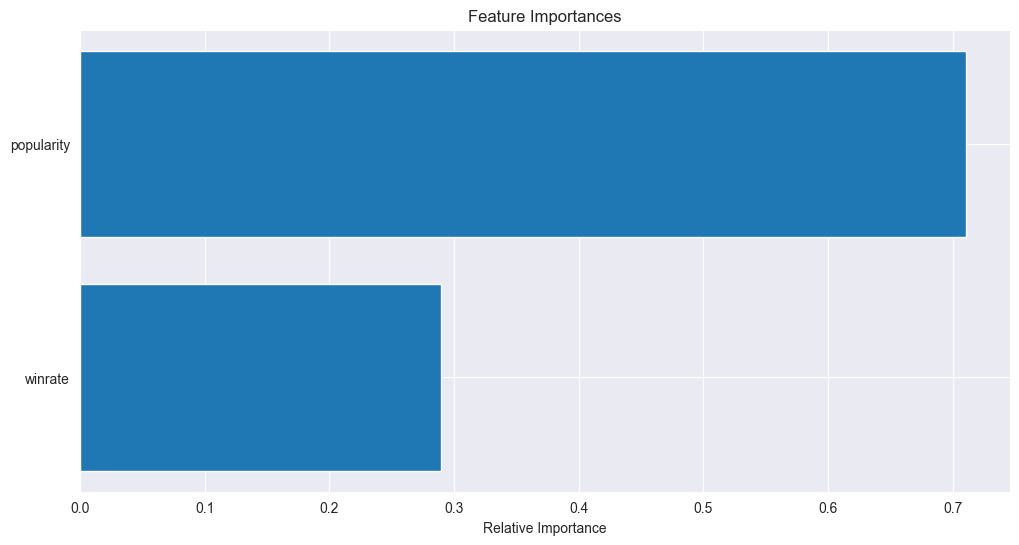

In [8]:
# 6.2.2

features = ['popularity', 'winrate']
target = 'banrate'

champions = champions.dropna(subset=features + [target])

X = champions[features]
Y = champions[target]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=20, random_state=42)

randomForest = RandomForestRegressor(n_estimators=100, random_state=42)
randomForest.fit(X_train, Y_train)

Y_train_pred = randomForest.predict(X_train)
Y_test_pred = randomForest.predict(X_test)

Y_combined = numpy.concatenate([Y_train, Y_test])
Y_combined_pred = numpy.concatenate([Y_train_pred, Y_test_pred])

TrainR2 = randomForest.score(X_train, Y_train)
TestR2 = randomForest.score(X_test, Y_test)

TrainMSE = mean_squared_error(Y_train, Y_train_pred)
TestMSE = mean_squared_error(Y_test, Y_test_pred)
OverallMSE = mean_squared_error(Y_combined, Y_combined_pred)

print("Train Determination Coefficient (R^2):", TrainR2)
print("Test Determination Coefficient (R^2):", TestR2)
print("Overall Determination Coefficient (R^2):", r2_score(Y_combined, Y_combined_pred))
print("Train Mean Squared Error (MSE):", TrainMSE)
print("Test Mean Squared Error (MSE):", TestMSE)
print("Overall Mean Squared Error (MSE):", OverallMSE)

importances = randomForest.feature_importances_
indices = importances.argsort()

plot.figure(figsize=(12, 6))
plot.title("Feature Importances")
plot.barh(range(len(indices)), importances[indices], align="center")
plot.yticks(range(len(indices)), [features[i] for i in indices])
plot.xlabel("Relative Importance")
plot.show()

In [16]:
# 7

results = {
    'Model': ['Regression 1', 'Regression 2', 'Decision Tree 1', 'Decision Tree 2', 'Random Forest 1', 'Random Forest 2'],
    'Research Question': [1,2,1,2,1,2],
    'Determination Coefficient (R^2)': ['0.1476228551800477', '0.24931904093175195', '0.9373363137833869', '0.5585842790318705', '0.8469561365943215', '0.7820364760910814'],
    'Mean Square Error': ['0.21927787191177023', '0.0032800134216433487', '0.323292309352005', '0.0016353170901722662', '0.7895785744480707', '0.0008074915748371392'],
    'Overall Performance': ['Very Bad', 'Bad', 'Good', 'Very Good', 'Good', 'Very Good']
}

table = pandas.DataFrame(results)

print(table)

             Model  Research Question Determination Coefficient (R^2)  \
0     Regression 1                  1              0.1476228551800477   
1     Regression 2                  2             0.24931904093175195   
2  Decision Tree 1                  1              0.9373363137833869   
3  Decision Tree 2                  2              0.5585842790318705   
4  Random Forest 1                  1              0.8469561365943215   
5  Random Forest 2                  2              0.7820364760910814   

       Mean Square Error Overall Performance  
0    0.21927787191177023            Very Bad  
1  0.0032800134216433487                 Bad  
2      0.323292309352005                Good  
3  0.0016353170901722662           Very Good  
4     0.7895785744480707                Good  
5  0.0008074915748371392           Very Good  
